### Import all necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display

#### Bring in income data and obtain average annual income for Singaporeans

In [59]:
df_income = pd.read_csv("/Users/jemyap/Desktop/HDB_Assessment/AssessableIncomeofIndividuals.csv")
df_income['mean_annual_income'] = df_income['assessable_income'] / df_income['no_of_indv_assessed']
df_income ['year'] = df_income ['year_of_assessment'] 
df_income.drop('year_of_assessment', axis=1, inplace=True)
df_income


,no_of_indv_assessed,total_income,donations,assessable_income,mean_annual_income,year
0,1734218,71878947,254217,71624730,41.300880,2004
1,1528861,71594148,247025,71347123,46.666847,2005
2,1461040,75480305,323978,75156326,51.440293,2006
3,1522175,84724808,282038,84442770,55.475073,2007
4,1616707,98848536,357352,98491184,60.920862,2008
5,1650385,106856700,349723,106506977,64.534625,2009
6,1728186,107768942,473754,107295188,62.085440,2010
7,1829400,121006829,586485,120420344,65.825049,2011
8,1968605,134731182,623831,134107351,68.123037,2012
9,2114924,144995861,688972,144306888,68.232659,2013


#### Bring in HDB resale prices between 2000 to 2024

In [4]:
path_2000_to_2012 = "/Users/jemyap/Desktop/HDB_Assessment/Public Housing Prices/ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv"
path_2012_to_2014 = "/Users/jemyap/Desktop/HDB_Assessment/Public Housing Prices/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv"
path_2015_to_2016 = "/Users/jemyap/Desktop/HDB_Assessment/Public Housing Prices/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv"
path_2017_onwards = "/Users/jemyap/Desktop/HDB_Assessment/Public Housing Prices/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv"


Function to concatenate dataframes and drop duplicates

In [5]:
def concat_df(df1, df2):
    df3 = pd.concat([df1, df2])
    df3 = df3.drop_duplicates()
    return df3

In [6]:
df_2000_2012 = pd.read_csv(path_2000_to_2012)
df2_2012_2014 = pd.read_csv(path_2012_to_2014)
df_2015_2016 = pd.read_csv(path_2015_to_2016)
df_2017_onwards = pd.read_csv(path_2017_onwards)

concat1 = concat_df(df_2000_2012, df2_2012_2014)
concat2 = concat_df(concat1, df_2015_2016)
final_df = concat_df(concat2, df_2017_onwards)
final_df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0,NaN
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0,NaN
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0,NaN
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0,NaN
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
169442,2024-01,YISHUN,5 ROOM,213,YISHUN ST 21,04 TO 06,121.0,Improved,1985,615000.0,60 years 01 month
169443,2024-01,YISHUN,5 ROOM,223,YISHUN ST 21,07 TO 09,134.0,Model A,1986,660000.0,61 years 02 months
169444,2024-01,YISHUN,5 ROOM,505C,YISHUN ST 51,04 TO 06,112.0,Improved,2016,640000.0,91 years 03 months
169445,2024-01,YISHUN,5 ROOM,513C,YISHUN ST 51,07 TO 09,113.0,Improved,2018,675000.0,93 years 03 months


Perform some data wrangling to suit the purpose of this exercise

In [7]:
final_df['month'] = pd.to_datetime(final_df['month'])
final_df['year'] = final_df['month'].dt.year
final_df["years_left"] = 99 - (final_df['year'] - final_df['lease_commence_date'])
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 627388 entries, 0 to 169446
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                627388 non-null  datetime64[ns]
 1   town                 627388 non-null  object        
 2   flat_type            627388 non-null  object        
 3   block                627388 non-null  object        
 4   street_name          627388 non-null  object        
 5   storey_range         627388 non-null  object        
 6   floor_area_sqm       627388 non-null  float64       
 7   flat_model           627388 non-null  object        
 8   lease_commence_date  627388 non-null  int64         
 9   resale_price         627388 non-null  float64       
 10  remaining_lease      206295 non-null  object        
 11  year                 627388 non-null  int64         
 12  years_left           627388 non-null  int64         
dtypes: datetime64[

Select relevant columns for analysis

In [86]:
columns = ['year', 'town', 'flat_type', 'resale_price', 'years_left']
df_resale_prices = final_df[columns]
df_resale_prices = df_resale_prices.sort_values(['year', 'town', 'flat_type', 'years_left'], ascending=False)
df_resale_prices

,year,town,flat_type,resale_price,years_left
169446,2024,YISHUN,EXECUTIVE,860000.0,63
169445,2024,YISHUN,5 ROOM,675000.0,93
169444,2024,YISHUN,5 ROOM,640000.0,91
169440,2024,YISHUN,5 ROOM,585000.0,63
169441,2024,YISHUN,5 ROOM,695000.0,63
...,...,...,...,...,...
28701,2000,ANG MO KIO,2 ROOM,98000.0,77
28702,2000,ANG MO KIO,2 ROOM,96000.0,77
28703,2000,ANG MO KIO,2 ROOM,105000.0,77
28704,2000,ANG MO KIO,2 ROOM,88000.0,77


Bin years left on lease

In [92]:

bins = [i for i in range(0, 101, 10)]
labels = [f"{i}-{i+9}" for i in range(0, 91, 10)]

df_resale_prices['years_left_bins'] = pd.cut(df_resale_prices['years_left'], bins=bins, labels=labels, include_lowest=True)
print(df_resale_prices)

        year        town  flat_type  resale_price  years_left years_left_bins
169446  2024      YISHUN  EXECUTIVE      860000.0          63           60-69
169445  2024      YISHUN     5 ROOM      675000.0          93           90-99
169444  2024      YISHUN     5 ROOM      640000.0          91           90-99
169440  2024      YISHUN     5 ROOM      585000.0          63           60-69
169441  2024      YISHUN     5 ROOM      695000.0          63           60-69
...      ...         ...        ...           ...         ...             ...
28701   2000  ANG MO KIO     2 ROOM       98000.0          77           70-79
28702   2000  ANG MO KIO     2 ROOM       96000.0          77           70-79
28703   2000  ANG MO KIO     2 ROOM      105000.0          77           70-79
28704   2000  ANG MO KIO     2 ROOM       88000.0          77           70-79
32024   2000  ANG MO KIO     2 ROOM       88500.0          77           70-79

[627388 rows x 6 columns]


### Explore how price to income ratio changes with lease remaining on lease

As expected, the price-to-income ratio falls when the years left on lease decreases and vice versa.

In [88]:
df_income_select = df_income[['year', 'mean_annual_income']]

In [91]:
df_resale_prices_lease_remaining = df_resale_prices[(df_resale_prices['year'] == 2022) & (df_resale_prices['flat_type'] == '4 ROOM')]
df_resale_prices_lease_remaining = df_resale_prices_lease_remaining.groupby(['year', 'town', 'years_left_bins', 'flat_type']).agg({'resale_price' : 'median'}).reset_index()
df_resale_prices_lease_remaining = df_resale_prices_lease_remaining.merge(df_income_select, on='year', how='left')
df_resale_prices_lease_remaining['price_income_ratio'] = df_resale_prices_lease_remaining['resale_price'] / (df_resale_prices_lease_remaining['mean_annual_income'] * 1000)
df_resale_prices_lease_remaining 

,year,town,years_left_bins,flat_type,resale_price,mean_annual_income,price_income_ratio
0,2022,ANG MO KIO,0-9,4 ROOM,NaN,86.162824,NaN
1,2022,ANG MO KIO,10-19,4 ROOM,NaN,86.162824,NaN
2,2022,ANG MO KIO,20-29,4 ROOM,NaN,86.162824,NaN
3,2022,ANG MO KIO,30-39,4 ROOM,NaN,86.162824,NaN
4,2022,ANG MO KIO,40-49,4 ROOM,NaN,86.162824,NaN
...,...,...,...,...,...,...,...
255,2022,YISHUN,50-59,4 ROOM,430000.0,86.162824,4.990551
256,2022,YISHUN,60-69,4 ROOM,432000.0,86.162824,5.013763
257,2022,YISHUN,70-79,4 ROOM,450000.0,86.162824,5.222670
258,2022,YISHUN,80-89,4 ROOM,495000.0,86.162824,5.744937


/Users/jemyap/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/Users/jemyap/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/Users/jemyap/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/Users/jemyap/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/Users/jemyap/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/Users/jemyap/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning:



The `ci` parameter is

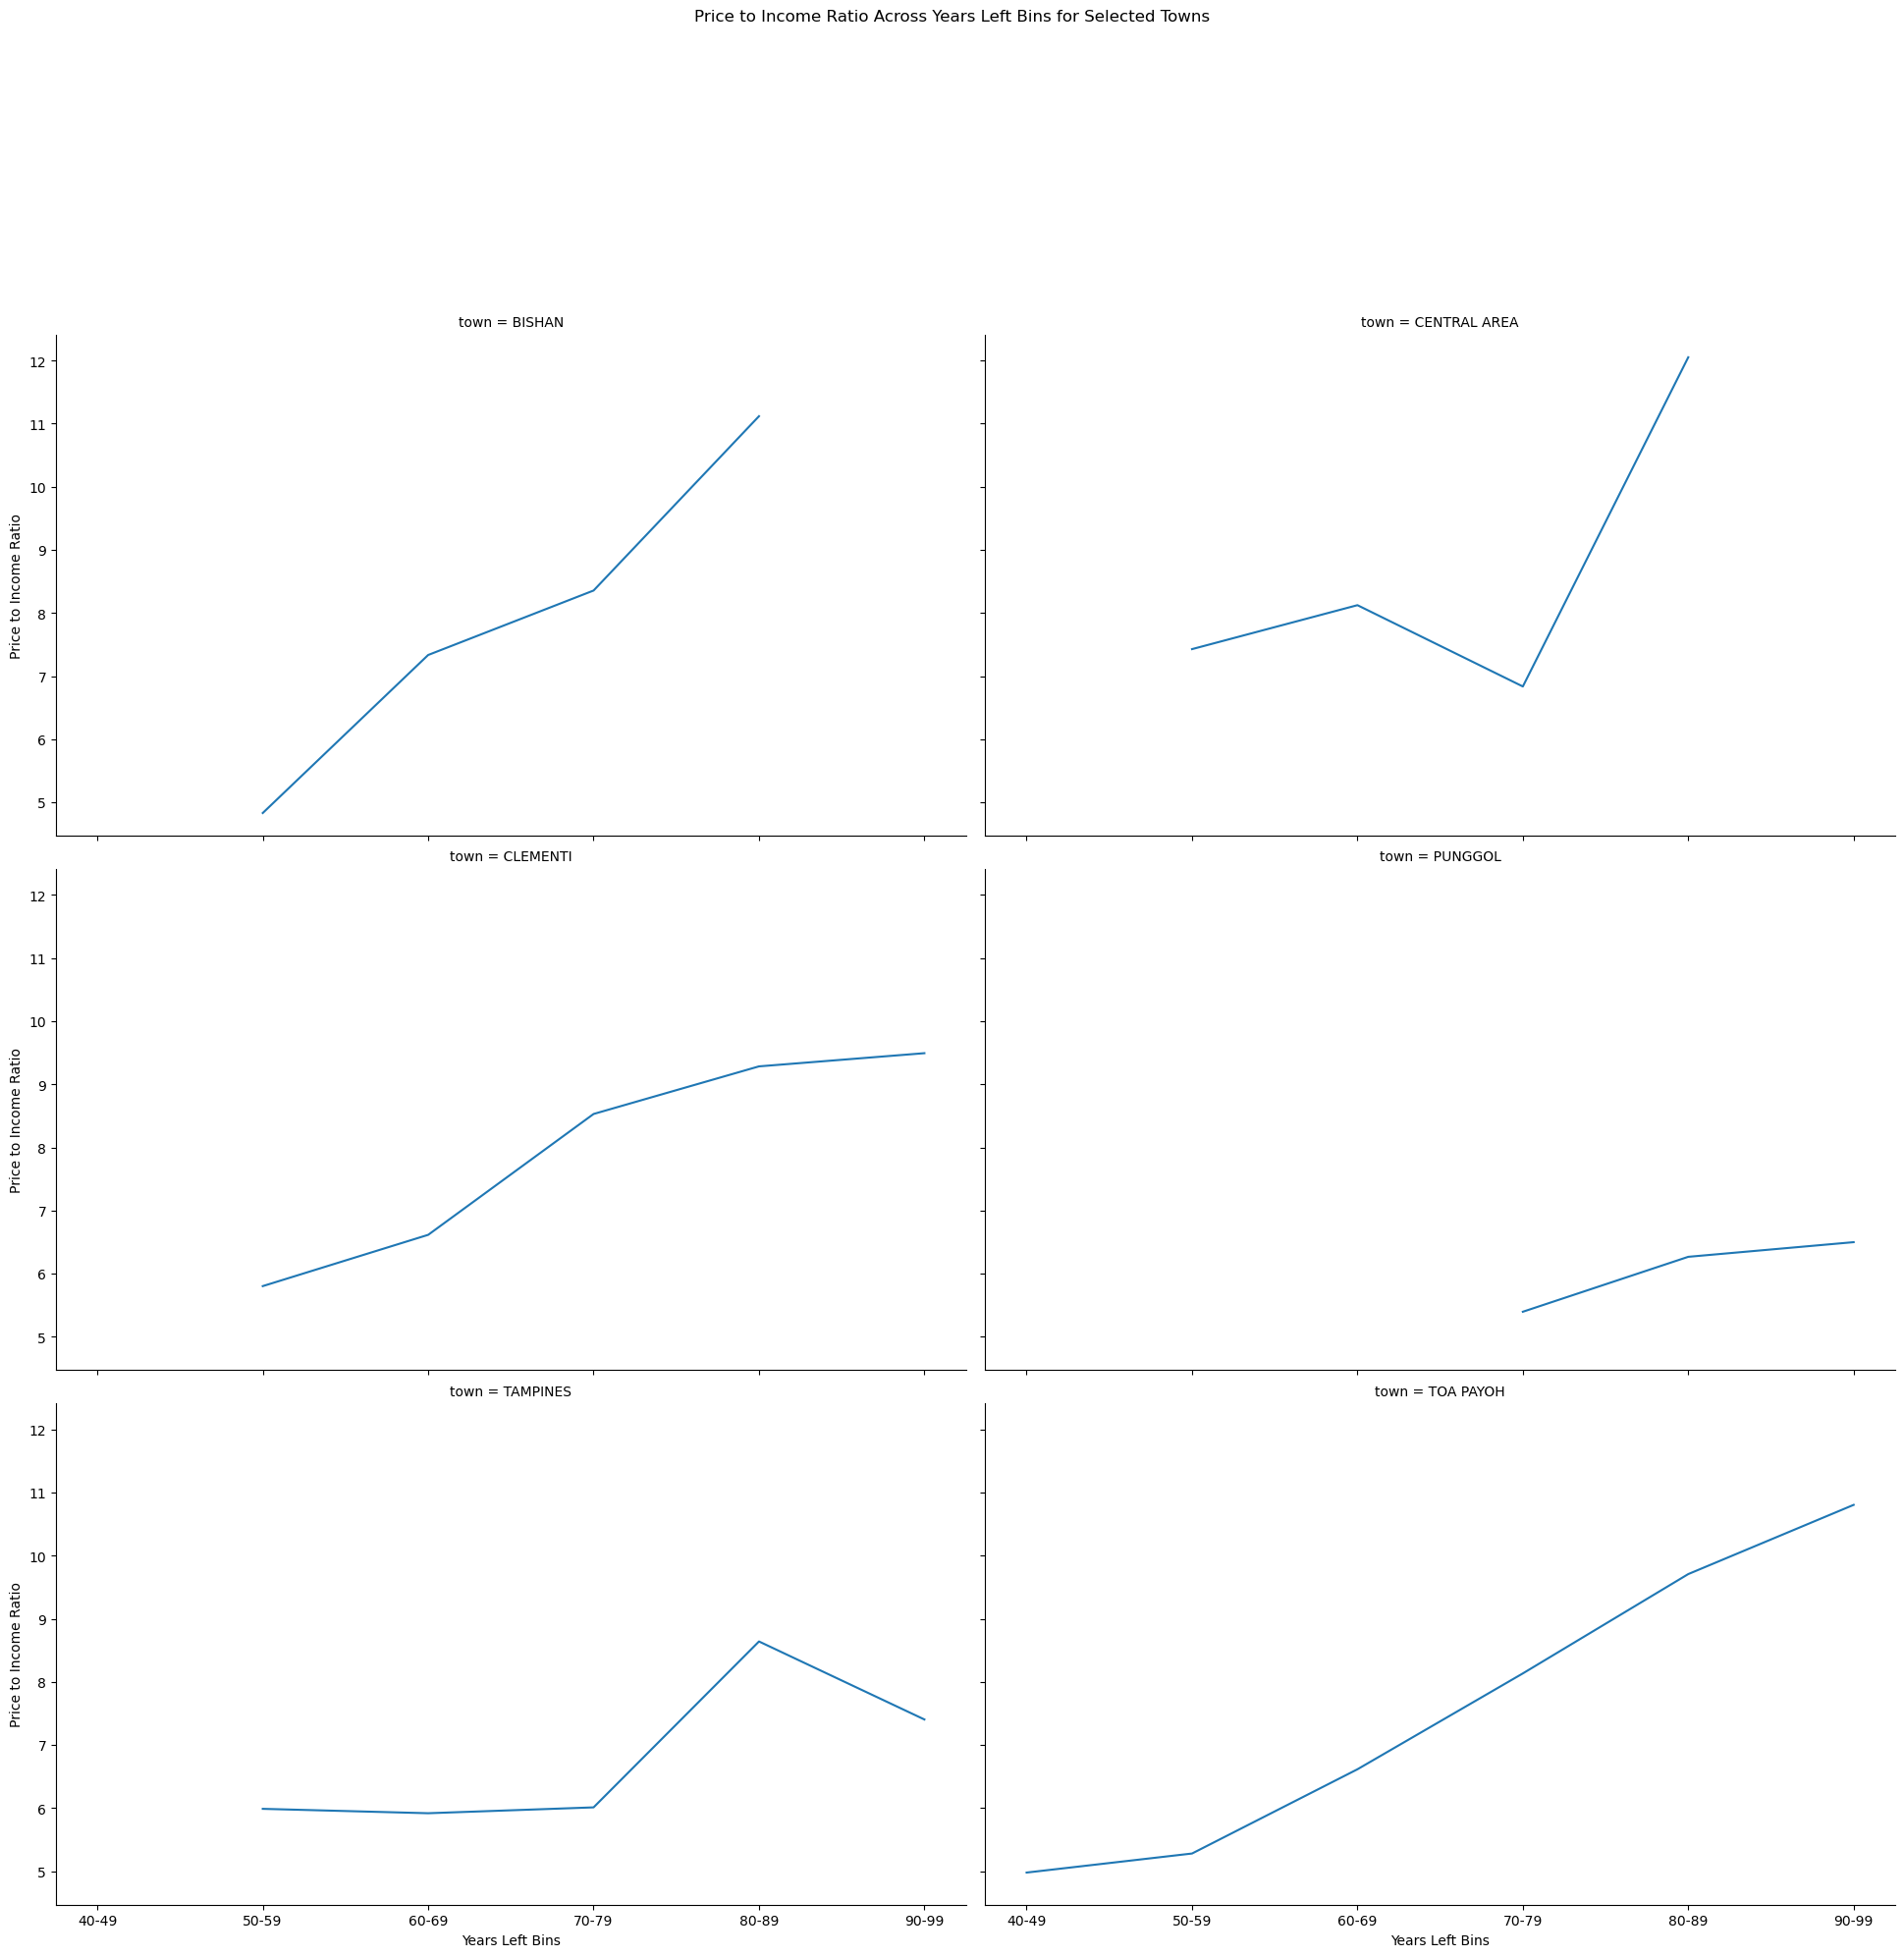

In [97]:
selected_towns = ['CLEMENTI', 'BISHAN', 'TOA PAYOH', 'PUNGGOL', 'CENTRAL AREA', 'TAMPINES']
selected_data = df_resale_prices_lease_remaining[df_resale_prices_lease_remaining['town'].isin(selected_towns)]

g = sns.FacetGrid(selected_data, col='town', col_wrap=2, height=6.5, aspect=1.5)
g.map(sns.lineplot, 'years_left_bins', 'price_income_ratio', ci=None)
g.set_axis_labels('Years Left Bins', 'Price to Income Ratio')
g.fig.suptitle('Price to Income Ratio Across Years Left Bins for Selected Towns', y=1.02)
plt.subplots_adjust(top=0.85)

plt.show()

### Filter out houses with less than 65 years left on lease. Narrow our scope to look at public housing affordability for first time home buyers who are typically in their mid 20s to early 30s who wouldn't typically consider flats that have too few years left on their lease.

In [93]:
df_resale_prices_65 = df_resale_prices[df_resale_prices['years_left'] >= 65]

### Plot distribution of housing prices

The distribution of resale prices is right skewed, with more outlier data containing high resale prices. We will use median resale prices for our analysis.

In [94]:
df_resale_prices_65_2022 = df_resale_prices_65[df_resale_prices_65['year'] == 2022]

In [95]:
fig = px.histogram(df_resale_prices_65_2022, x='resale_price', nbins=30, title='Distribution of Resale Prices',
                   labels={'resale_price': 'Resale Price', 'count': 'Number of sales'})

median_price = df_resale_prices_65_2022['resale_price'].median()
mean_price = df_resale_prices_65_2022['resale_price'].mean()

fig.update_layout(
    shapes=[
        dict(type='line', x0=median_price, x1=median_price, y0=0, y1=1, xref='x', yref='paper', line=dict(color='red', width=2)),
        dict(type='line', x0=mean_price, x1=mean_price, y0=0, y1=1, xref='x', yref='paper', line=dict(color='green', width=2))
    ],
    annotations=[
        dict(x=median_price, y=1.05, xref='x', yref='paper', text=f'Median: {median_price:.2f}', showarrow=False),
        dict(x=mean_price, y=1.11, xref='x', yref='paper', text=f'Mean: {mean_price:.2f}', showarrow=False)
    ]
)

fig.update_layout(xaxis_title='Resale Price', yaxis_title='Number of sales')


fig.show()

## [Analysis 1]  Median housing price per year for flat type measured against annual income

#### We will look at median resale prices for each flat_type

In [12]:
df_analysis_3 = df_resale_prices_65.groupby(['year','flat_type']).agg({'resale_price' : 'median'}).reset_index()
df_analysis_3

,year,flat_type,resale_price
0,2000,1 ROOM,48000.0
1,2000,2 ROOM,83000.0
2,2000,3 ROOM,156000.0
3,2000,4 ROOM,254000.0
4,2000,5 ROOM,373000.0
...,...,...,...
153,2024,2 ROOM,335000.0
154,2024,3 ROOM,473600.0
155,2024,4 ROOM,592000.0
156,2024,5 ROOM,642500.0


### Bring in relevant income data

In [13]:
df_income_2 = df_income[['year_of_assessment', 'mean_annual_income']]
df_income_2['year'] = df_income_2['year_of_assessment']
df_income_2.drop('year_of_assessment', axis=1, inplace=True)
df_income_2

/var/folders/pg/rfrygnnj6js6hvd_b_90mn5w0000gn/T/ipykernel_73848/2038706640.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/pg/rfrygnnj6js6hvd_b_90mn5w0000gn/T/ipykernel_73848/2038706640.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,mean_annual_income,year
0,41.300880,2004
1,46.666847,2005
2,51.440293,2006
3,55.475073,2007
4,60.920862,2008
5,64.534625,2009
6,62.085440,2010
7,65.825049,2011
8,68.123037,2012
9,68.232659,2013


Between 2004 to 2022, the mean annual income of Singaporeans has increased steadily, more than doubling in a span of 19 years.

In [14]:
fig = px.line(df_income_2, x='year', y='mean_annual_income', title='Mean Annual Income Over Years',
              labels={'mean_annual_income': 'Mean Annual Income', 'year': 'Year'})

fig.update_layout(xaxis_title='Year', yaxis_title='Mean Annual Income')

fig.show()

#### Median resale prices for each flat type to median annual income ratio

In [15]:
df_price_income = df_analysis_3.merge(df_income_2, on='year', how='left')
df_price_income = df_price_income[df_price_income['year'].between(2004,2022)]
df_price_income['price_income_ratio'] = df_price_income['resale_price'] / (df_price_income['mean_annual_income'] * 1000)
df_price_income

,year,flat_type,resale_price,mean_annual_income,price_income_ratio
28,2004,1 ROOM,63000.0,41.300880,1.525391
29,2004,2 ROOM,110000.0,41.300880,2.663381
30,2004,3 ROOM,172000.0,41.300880,4.164560
31,2004,4 ROOM,235000.0,41.300880,5.689951
32,2004,5 ROOM,308000.0,41.300880,7.457468
...,...,...,...,...,...
143,2022,3 ROOM,430000.0,86.162824,4.990551
144,2022,4 ROOM,530000.0,86.162824,6.151145
145,2022,5 ROOM,615000.0,86.162824,7.137649
146,2022,EXECUTIVE,750000.0,86.162824,8.704450


In [16]:
pivot_table = df_price_income.pivot_table(values='price_income_ratio', index='year', columns='flat_type')
pivot_table

flat_type,1 ROOM,2 ROOM,3 ROOM,4 ROOM,5 ROOM,EXECUTIVE,MULTI-GENERATION
year,,,,,,,
2004,1.525391,2.663381,4.164560,5.689951,7.457468,9.200772,10.108743
2005,1.607137,2.421419,3.578558,4.928552,6.233290,7.671399,8.999965
2006,1.652401,2.332802,3.164834,4.471203,5.618164,6.804005,7.581605
2007,1.703468,2.379447,3.136544,4.416398,5.497965,6.669662,7.210446
2008,2.019013,2.633646,3.611242,4.924421,6.057038,7.304558,7.698512
2009,2.347577,2.835687,3.773168,4.989570,5.965790,7.127957,7.608319
2010,NaN,3.462970,4.524217,5.798461,6.925939,8.214486,9.664102
2011,NaN,3.828330,4.830988,6.183057,7.292057,8.659318,10.186092
2012,NaN,3.934058,5.035007,6.450094,7.589210,9.027783,11.376475


In [36]:
pivot_table = df_price_income.pivot_table(values='price_income_ratio', index='year', columns='flat_type')
pivot_table.reset_index(inplace=True)

fig = px.line(pivot_table, x='year', y=pivot_table.columns[1:], title='Price-to-Income Ratio Across Years for Each Flat Type')
fig.update_xaxes(tickmode='linear', tick0=2004, dtick=1)

fig.show()


## [Analysis 2] Median housing price to mean annual income ratio according to townships

In [18]:
display(df_resale_prices, df_income_2)

,year,town,flat_type,resale_price,years_left
0,2000,ANG MO KIO,3 ROOM,147000.0,85
1,2000,ANG MO KIO,3 ROOM,144000.0,85
2,2000,ANG MO KIO,3 ROOM,159000.0,75
3,2000,ANG MO KIO,3 ROOM,167000.0,75
4,2000,ANG MO KIO,3 ROOM,163000.0,75
...,...,...,...,...,...
169442,2024,YISHUN,5 ROOM,615000.0,60
169443,2024,YISHUN,5 ROOM,660000.0,61
169444,2024,YISHUN,5 ROOM,640000.0,91
169445,2024,YISHUN,5 ROOM,675000.0,93


,mean_annual_income,year
0,41.300880,2004
1,46.666847,2005
2,51.440293,2006
3,55.475073,2007
4,60.920862,2008
5,64.534625,2009
6,62.085440,2010
7,65.825049,2011
8,68.123037,2012
9,68.232659,2013


In [19]:
housingprice_income_township = df_resale_prices.merge(df_income_2, on='year', how='left')
housingprice_income_township = housingprice_income_township[housingprice_income_township['year'].between(2004,2022)]
housingprice_income_township['price_income_ratio'] = housingprice_income_township['resale_price'] / (housingprice_income_township['mean_annual_income'] * 1000)
housingprice_income_township

,year,town,flat_type,resale_price,years_left,mean_annual_income,price_income_ratio
137750,2004,ANG MO KIO,2 ROOM,115000.0,81,41.300880,2.784444
137751,2004,ANG MO KIO,2 ROOM,110000.0,81,41.300880,2.663381
137752,2004,ANG MO KIO,2 ROOM,114200.0,81,41.300880,2.765074
137753,2004,ANG MO KIO,3 ROOM,130000.0,81,41.300880,3.147633
137754,2004,ANG MO KIO,3 ROOM,148800.0,76,41.300880,3.602829
...,...,...,...,...,...,...,...
601346,2022,YISHUN,EXECUTIVE,782000.0,64,86.162824,9.075840
601347,2022,YISHUN,EXECUTIVE,788000.0,65,86.162824,9.145476
601348,2022,YISHUN,EXECUTIVE,788000.0,64,86.162824,9.145476
601349,2022,YISHUN,EXECUTIVE,800000.0,65,86.162824,9.284747


In [20]:
housingprice_income_township_4rooom = housingprice_income_township[housingprice_income_township['flat_type'] == '4 ROOM']
housingprice_income_township_4rooom

,year,town,flat_type,resale_price,years_left,mean_annual_income,price_income_ratio
137836,2004,ANG MO KIO,4 ROOM,242000.0,88,41.300880,5.859439
137837,2004,ANG MO KIO,4 ROOM,271000.0,88,41.300880,6.561603
137838,2004,ANG MO KIO,4 ROOM,225000.0,71,41.300880,5.447826
137839,2004,ANG MO KIO,4 ROOM,200000.0,71,41.300880,4.842512
137840,2004,ANG MO KIO,4 ROOM,225000.0,72,41.300880,5.447826
...,...,...,...,...,...,...,...
601314,2022,YISHUN,4 ROOM,540000.0,95,86.162824,6.267204
601315,2022,YISHUN,4 ROOM,545000.0,95,86.162824,6.325234
601316,2022,YISHUN,4 ROOM,548000.0,95,86.162824,6.360052
601317,2022,YISHUN,4 ROOM,560000.0,95,86.162824,6.499323


In [21]:
housingprice_income_township_4rooom_town = housingprice_income_township_4rooom.groupby(['town', 'year']).agg({'price_income_ratio' : 'mean'})\
                                                                                .reset_index().sort_values('price_income_ratio', ascending=True)\
                                                                                    .sort_values(['town', 'year'])
housingprice_income_township_4rooom_town

,town,year,price_income_ratio
0,ANG MO KIO,2004,5.892693
1,ANG MO KIO,2005,5.392981
2,ANG MO KIO,2006,5.086518
3,ANG MO KIO,2007,5.190183
4,ANG MO KIO,2008,5.621014
...,...,...,...
488,YISHUN,2018,4.581529
489,YISHUN,2019,4.740770
490,YISHUN,2020,4.775537
491,YISHUN,2021,5.436190


In [22]:
fig = px.line(housingprice_income_township_4rooom_town, x='year', y='price_income_ratio', color='town',
              title='Price to Income Ratio Across Years for Each Township',
              labels={'year': 'Year', 'price_income_ratio': 'Price to Income Ratio', 'town': 'Township'})

fig.update_layout(xaxis_title='Year', yaxis_title='Price to Income Ratio')

fig.show()


In [23]:
housingprice_income_township_4rooom_town_top5 = housingprice_income_township_4rooom_town[housingprice_income_township_4rooom_town['town']\
                                                                                         .isin(['QUEENSTOWN', 'CENTRAL AREA', 'KALLANG/WHAMPOA', 'BUKIT MERAH', 'TOA PAYOH'])]

The top 5 towns in terms of price to income ratio saw substantial increases in this ratio from 2004 to 2022.

In [24]:
fig = px.line(housingprice_income_township_4rooom_town_top5, x='year', y='price_income_ratio', color='town',
              title='Price to Income Ratio Across Years for Each Township',
              labels={'year': 'Year', 'price_income_ratio': 'Price to Income Ratio', 'town': 'Township'})

fig.update_layout(xaxis_title='Year', yaxis_title='Price to Income Ratio')

fig.show()


Taking a closer look at the Central Area which saw the highest increase in the period of interest.

In [25]:
housingprice_income_township_4rooom_town_top5[housingprice_income_township_4rooom_town_top5['town'] == 'CENTRAL AREA']

,town,year,price_income_ratio
133,CENTRAL AREA,2004,7.229678
134,CENTRAL AREA,2005,6.121808
135,CENTRAL AREA,2006,5.694138
136,CENTRAL AREA,2007,6.247129
137,CENTRAL AREA,2008,6.770556
138,CENTRAL AREA,2009,6.701609
139,CENTRAL AREA,2010,7.535493
140,CENTRAL AREA,2011,7.811833
141,CENTRAL AREA,2012,8.056185
142,CENTRAL AREA,2013,8.421452


## [Additional Data Exploration] Observing differences between price-to-income ratios for 4 room vs 5 room flat types. 

- Central Area, Queenstown and Bukit Merah appear in the top 5 for both.
- Majority of townships only have a price to income ratio between 4 - 6.

<Axes: xlabel='price_income_ratio', ylabel='town'>

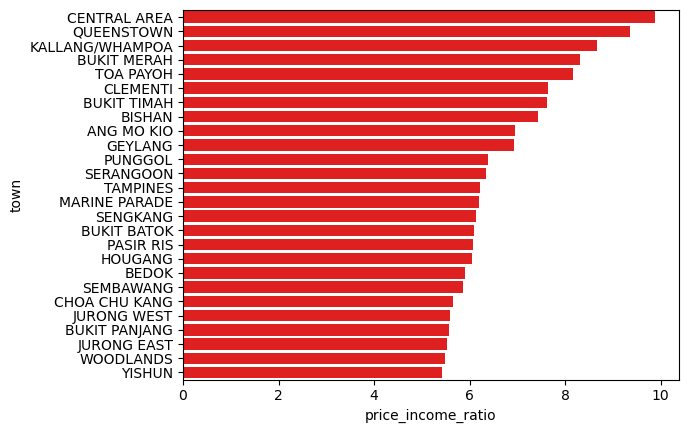

In [34]:
housingprice_income_township_4rooom_town_2022 = housingprice_income_township_4rooom_town[housingprice_income_township_4rooom_town['year'] == 2022].sort_values('price_income_ratio', ascending=False)

sns.barplot(housingprice_income_township_4rooom_town_2022, x='price_income_ratio', y='town', color='red')

In [27]:
housingprice_income_township_5rooom = housingprice_income_township[housingprice_income_township['flat_type'] == '5 ROOM']
housingprice_income_township_5rooom

,year,town,flat_type,resale_price,years_left,mean_annual_income,price_income_ratio
137865,2004,ANG MO KIO,5 ROOM,347000.0,74,41.300880,8.401758
137866,2004,ANG MO KIO,5 ROOM,358000.0,74,41.300880,8.668096
137867,2004,ANG MO KIO,5 ROOM,392000.0,74,41.300880,9.491323
137868,2004,ANG MO KIO,5 ROOM,328000.0,75,41.300880,7.941719
137869,2004,ANG MO KIO,5 ROOM,388000.0,75,41.300880,9.394473
...,...,...,...,...,...,...,...
601338,2022,YISHUN,5 ROOM,677000.0,95,86.162824,7.857217
601339,2022,YISHUN,5 ROOM,695000.0,64,86.162824,8.066124
601340,2022,YISHUN,5 ROOM,700000.0,95,86.162824,8.124153
601341,2022,YISHUN,5 ROOM,700000.0,65,86.162824,8.124153


In [28]:
housingprice_income_township_5rooom_town = housingprice_income_township_5rooom.groupby(['town', 'year']).agg({'price_income_ratio' : 'mean'})\
                                                                                .reset_index().sort_values('price_income_ratio', ascending=True)\
                                                                                    .sort_values(['town', 'year'])
housingprice_income_township_5rooom_town

,town,year,price_income_ratio
0,ANG MO KIO,2004,8.504900
1,ANG MO KIO,2005,7.448150
2,ANG MO KIO,2006,6.917081
3,ANG MO KIO,2007,7.076332
4,ANG MO KIO,2008,7.764504
...,...,...,...
488,YISHUN,2018,6.034584
489,YISHUN,2019,6.189064
490,YISHUN,2020,6.232016
491,YISHUN,2021,6.970446


<Axes: xlabel='price_income_ratio', ylabel='town'>

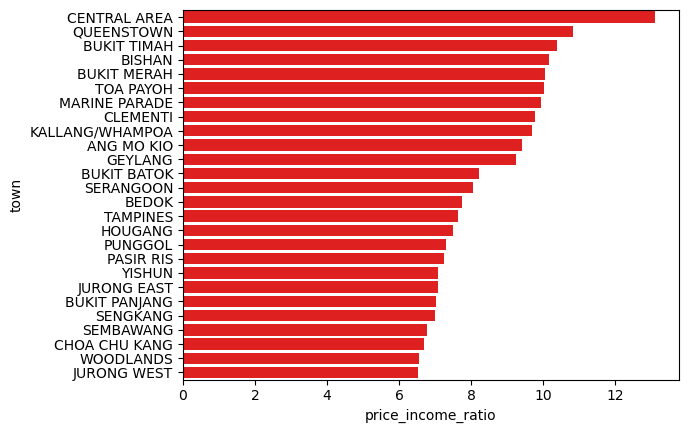

In [32]:
housingprice_income_township_5rooom_town_2022 = housingprice_income_township_5rooom_town[housingprice_income_township_5rooom_town['year'] == 2022].sort_values('price_income_ratio', ascending=False)
sns.barplot(data=housingprice_income_township_5rooom_town_2022, x='price_income_ratio', y='town', color='red')


### Further Enhancements to Analysis

- Median income would be a more appropriate statistical measure due to the tendency for income to have a right skewed distribution. Obtaining a dataset with median income across years would help to better answer the problem statement.

- Most of the analysis was done for 4-room flat type, the most popular flat type among first-time home owners. Further analyses can be done for the other flat types.

- Analysis did not fully take into account the number of years left on the lease and only took a median of flat prices for flats with at least 65 years left on their lease. Further analysis can be done on the affordability of newer flats which is a preference for first-time home owners.

- Potential deep dives into each township to explore reasons for difference in ratios. Conduct root-cause analysis on what Singaporeans value in public housing. 

- Comparing price to income ratio with other cities with similar land-scarce constraints if the conversation on public housing affordability revolves around comparing Singapore with other cities.